### Installing libraries and importing packages

In [1]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9004300de647a3753b83f69d5d4e4baff712aeeb1cde95ac309b36843dbcc137
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### Reading the Dataset

In [280]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer



In [224]:
retail_data = pd.read_excel("https://raw.githubusercontent.com/karapradeepkumar/data/main/Online%20Retail%202.xlsx", engine='openpyxl')

In [225]:
retail_data.shape

(541909, 8)

### Creating Data Profile

In [4]:
profile = ProfileReport(retail_data, title="Pandas Profiling Report")


In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exporting the report to a file


In [6]:
profile.to_file("retail_data.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data cleaning

In [226]:
# Display duplicate values
retail_data.duplicated().sum()

5268

In [227]:
# Dropping duplicate rows
retail_data.drop_duplicates(inplace=True)

In [228]:
# Display null values
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [55]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [229]:
# Handling missing CustomerID:
# If CustomerID is missing, we will create a placeholder category for analysis.
retail_data['CustomerID'].fillna('Unknown', inplace=True)

<ipython-input-229-75360b268ab7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail_data['CustomerID'].fillna('Unknown', inplace=True)
<ipython-input-229-75360b268ab7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  retail_data['CustomerID'].fillna('Unknown', inplace=True)


In [230]:
# We will not drop the nu.. values
#retail_data.dropna(inplace=True)
# Adding a new column to categorize rows with missing CustomerID
retail_data['CustomerID_Flag'] = retail_data['CustomerID'].apply(lambda x: 'Known' if x != 'Unknown' else 'Unknown')

In [231]:
# Add TotalPrice column
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

In [59]:
# Convert InvoiceDate to a datetime and use as index
#retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
#retail_data.set_index('InvoiceDate', inplace=True)

In [232]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34


In [235]:
# Segment Sales by Months and Days
# Add columns for Month and Day of the Week
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()

In [236]:
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
CustomerID_Flag,0
TotalPrice,0


In [237]:
# Extract numeric part from StockCode for use in segmentation
retail_data['NumericStockCode'] = retail_data['StockCode'].str.extract(r'(\d+)', expand=False).astype(float)

In [238]:
# Summary of the data
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         536641 non-null  object        
 1   StockCode         536641 non-null  object        
 2   Description       535187 non-null  object        
 3   Quantity          536641 non-null  int64         
 4   InvoiceDate       536641 non-null  datetime64[ns]
 5   UnitPrice         536641 non-null  float64       
 6   CustomerID        536641 non-null  object        
 7   Country           536641 non-null  object        
 8   CustomerID_Flag   536641 non-null  object        
 9   TotalPrice        536641 non-null  float64       
 10  Month             536641 non-null  int32         
 11  DayOfWeek         536641 non-null  object        
 12  NumericStockCode  51697 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)


In [240]:
# add a column with cancellation 1 if cancelled and 0 if not cancellation is based on Quantity <0
retail_data['Cancelled'] = retail_data['Quantity'].apply(lambda x: 1 if x < 0 else 0)

In [242]:
retail_data['InvoiceNo'] = retail_data['InvoiceNo'].astype(str)
retail_data['StockCode'] = retail_data['StockCode'].astype(str)
retail_data['Description'] = retail_data['Description'].astype(str)
retail_data['CustomerID'] = retail_data['CustomerID'].astype(str)

In [243]:
# saving the cleaned data to a parquet file
retail_data.to_parquet('retail_data.parquet')

In [244]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


In [245]:
# Display product description
top_categories = retail_data['Description'].value_counts().head(10).index.tolist()
top_categories

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'nan',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.']

### Feature engineering. - To delete
* Extracting color from the data
* Extracting shape from the data
* Extracting the number of items group

In [248]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


### Basic analysis of the data (descriptive statistics and visualization )

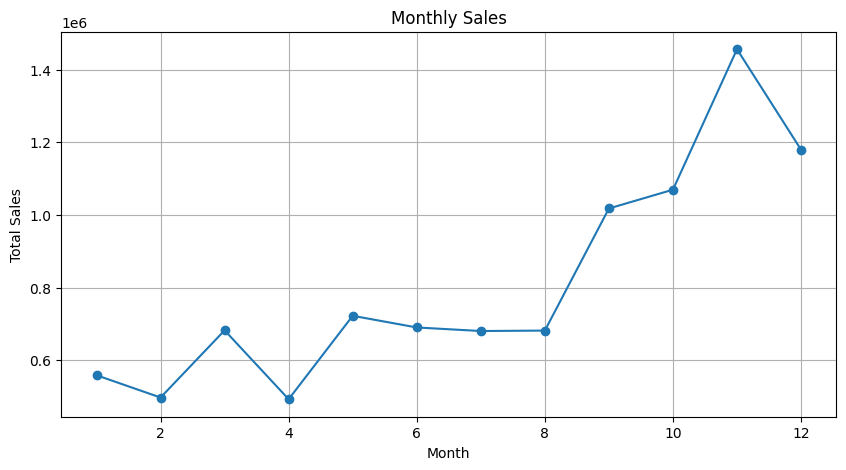

In [254]:
# Visualizing Monthly Sales
# Group sales by month and day of the week for analysis
monthly_sales = retail_data.groupby('Month')['TotalPrice'].sum()
daywise_sales = retail_data.groupby('DayOfWeek')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

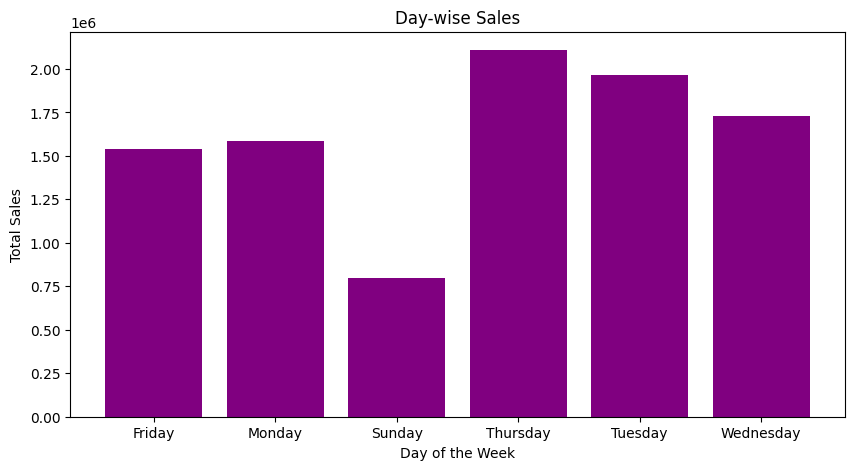

In [255]:
# Visualizing Day-wise Sales
plt.figure(figsize=(10, 5))
plt.bar(daywise_sales.index, daywise_sales.values, color='purple')
plt.title("Day-wise Sales")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()

### EDA

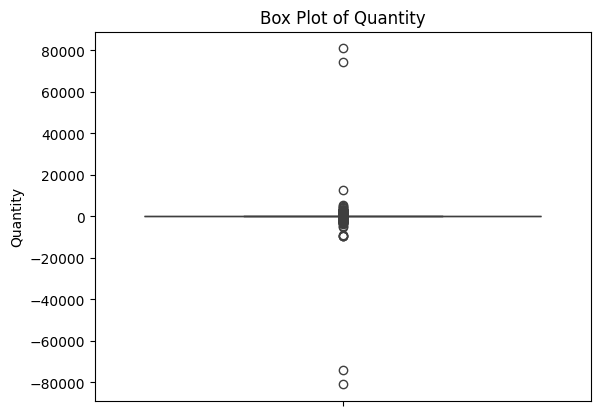

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.boxplot(y=retail_data['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

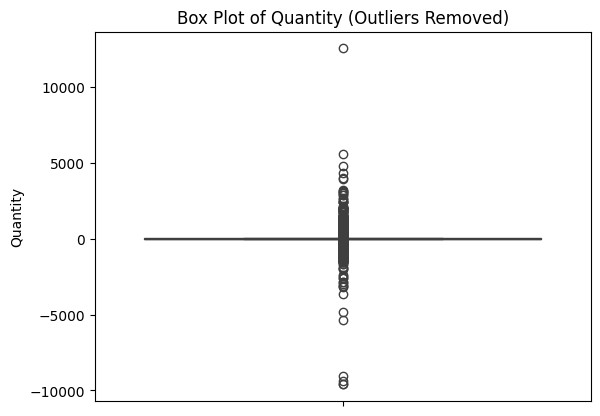

In [258]:
# Calculate the absolute difference from the median
median = retail_data['Quantity'].median()
abs_diff = np.abs(retail_data['Quantity'] - median)

# Get the indices of the two largest differences (outliers)
outlier_indices = abs_diff.nlargest(4).index

# Drop the rows corresponding to the outlier indices
filtered_data = retail_data.drop(outlier_indices)
#plt.figure(figsize=(6, 10))
sns.boxplot(y=filtered_data['Quantity'])
plt.title('Box Plot of Quantity (Outliers Removed)')
plt.ylabel('Quantity')
plt.show()

In [259]:
# Most sold products
top_products = filtered_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top revenue-generating products
top_revenue_products = filtered_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Most Sold Products:")
print(top_products)

print("\nTop 10 Revenue-Generating Products:")
print(top_revenue_products)


Top 10 Most Sold Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

Top 10 Revenue-Generating Products:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIG

In [260]:
# Total revenue by customer
customer_revenue = filtered_data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Total quantity purchased by customer
customer_quantity = filtered_data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Revenue:")
print(customer_revenue)

print("\nTop 10 Customers by Quantity Purchased:")
print(customer_quantity)


Top 10 Customers by Revenue:
CustomerID
Unknown    1447487.53
14646.0     279489.02
18102.0     256438.49
17450.0     187322.17
14911.0     132458.73
12415.0     123725.45
14156.0     113214.59
17511.0      88125.38
16684.0      65892.08
13694.0      62690.54
Name: TotalPrice, dtype: float64

Top 10 Customers by Quantity Purchased:
CustomerID
Unknown    269651
14646.0    196719
12415.0     77242
14911.0     77155
17450.0     69009
18102.0     64122
17511.0     63012
13694.0     61899
14298.0     58021
14156.0     56908
Name: Quantity, dtype: int64



Sales by Country:
Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
M

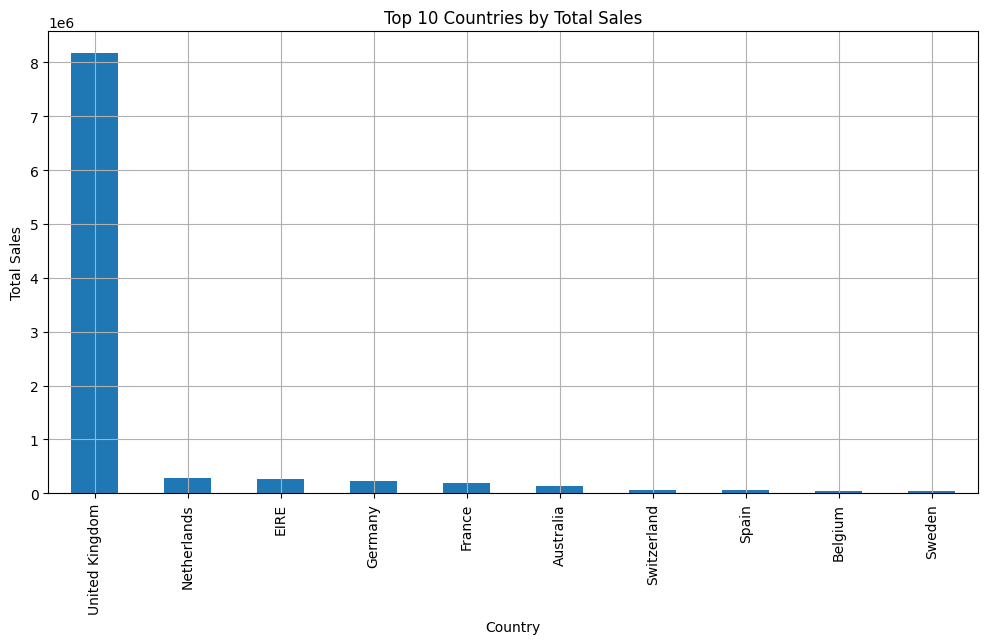

In [261]:
# Sales by country
country_sales = filtered_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\nSales by Country:")
print(country_sales)

# Top 10 countries by sales
top_countries = country_sales.head(10)

# Plot top countries by sales
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.grid()
plt.show()

In [263]:
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Known,10.20,12,Friday,NaN,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Known,12.60,12,Friday,NaN,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Known,16.60,12,Friday,NaN,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Known,16.60,12,Friday,NaN,0


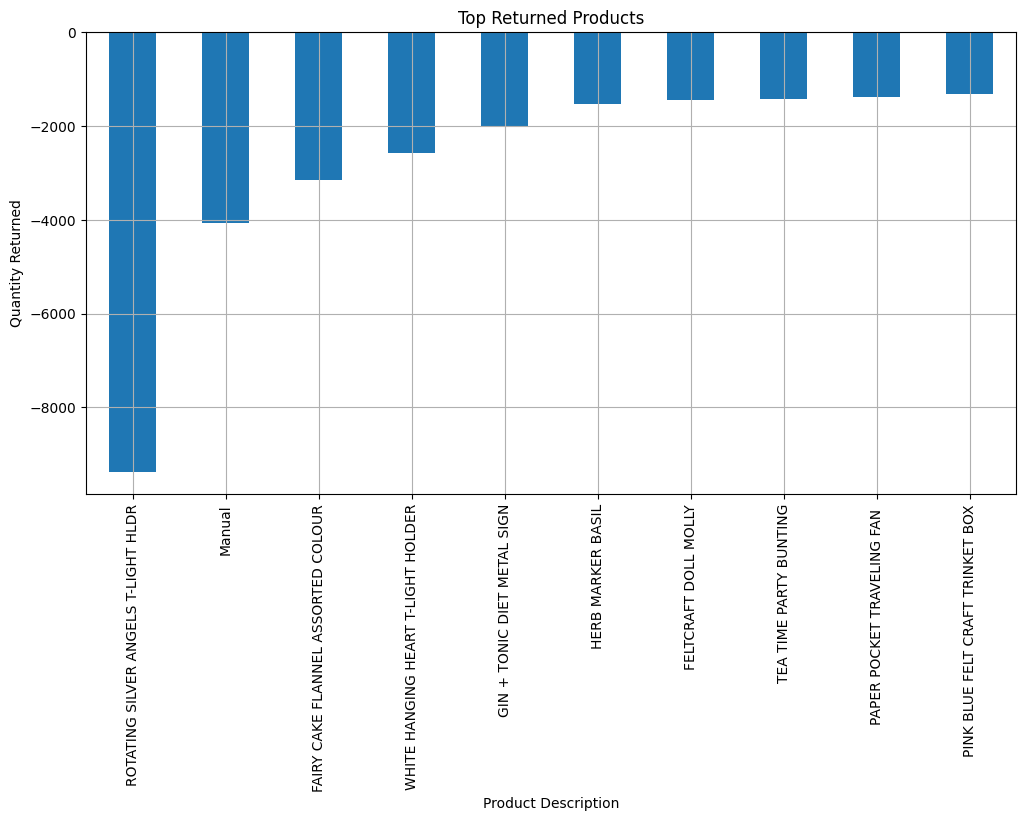

In [265]:
# Filter returns (negative quantities)
returns =  filtered_data[filtered_data['InvoiceNo'].astype(str).str.startswith('C')]

# Total returns by product
returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values()

# Plot top returned products
top_returns = returns_by_product.head(10)
plt.figure(figsize=(12, 6))
top_returns.plot(kind='bar')
plt.title("Top Returned Products")
plt.ylabel("Quantity Returned")
plt.xlabel("Product Description")
plt.grid()
plt.show()

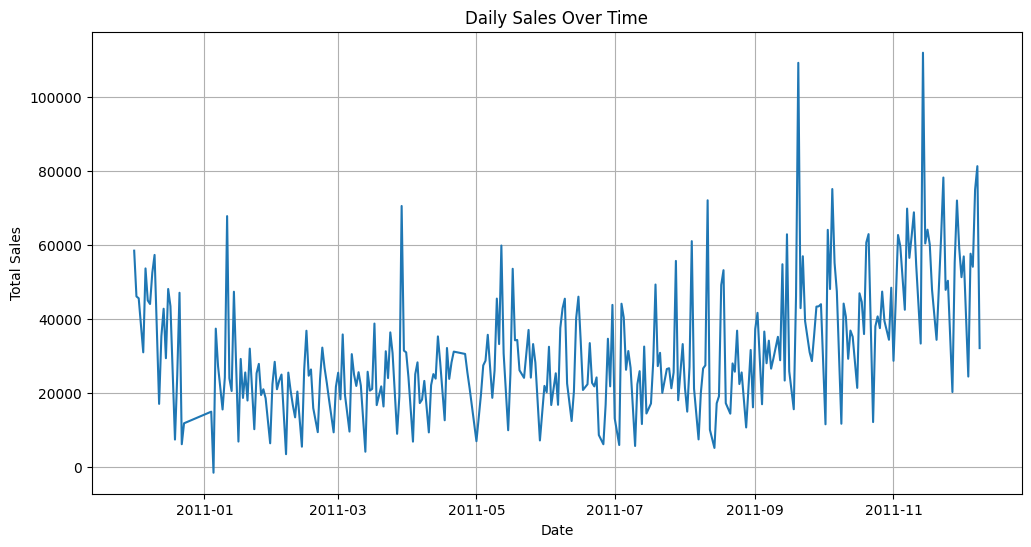

In [267]:
# Additional Exploratory Data Analysis
# Daily Sales Over Time
daily_sales = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

## Customer Segmentation

In [269]:
# Initial Exploration and Data Cleaning
# Remove negative quantities for segmentation and regression purposes
df_segmentation = filtered_data.copy()
df_segmentation = df_segmentation[df_segmentation['Quantity'] > 0]

In [272]:
df_segmentation.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


In [273]:
# Extract numeric part from StockCode for use in segmentation
df_segmentation['NumericStockCode'] = df_segmentation['StockCode'].str.extract(r'(\d+)', expand=False).astype(float)

In [275]:
# Retain all rows (including negative quantities) for cancellation analysis
df_cancellations = filtered_data[filtered_data['Quantity'] < 0]

### Product Clustering using K-Means - Required for customer segmentation and recommendation System

In [276]:
# Product Clustering
product_features = df_segmentation[['NumericStockCode']].drop_duplicates().dropna()
scaler = StandardScaler()
scaled_product_features = scaler.fit_transform(product_features)

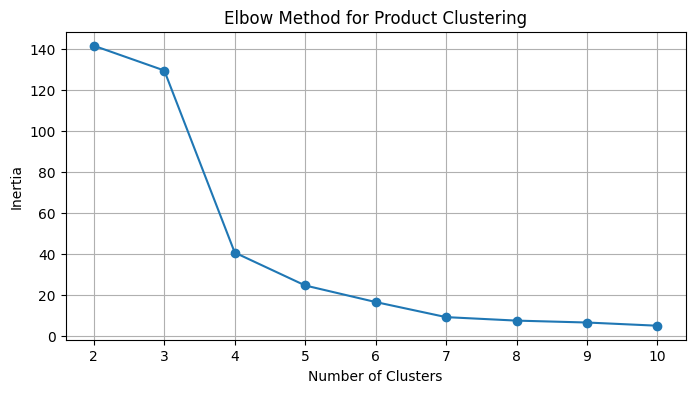

In [277]:
# Use the Elbow Method for product clustering
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_product_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Product Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

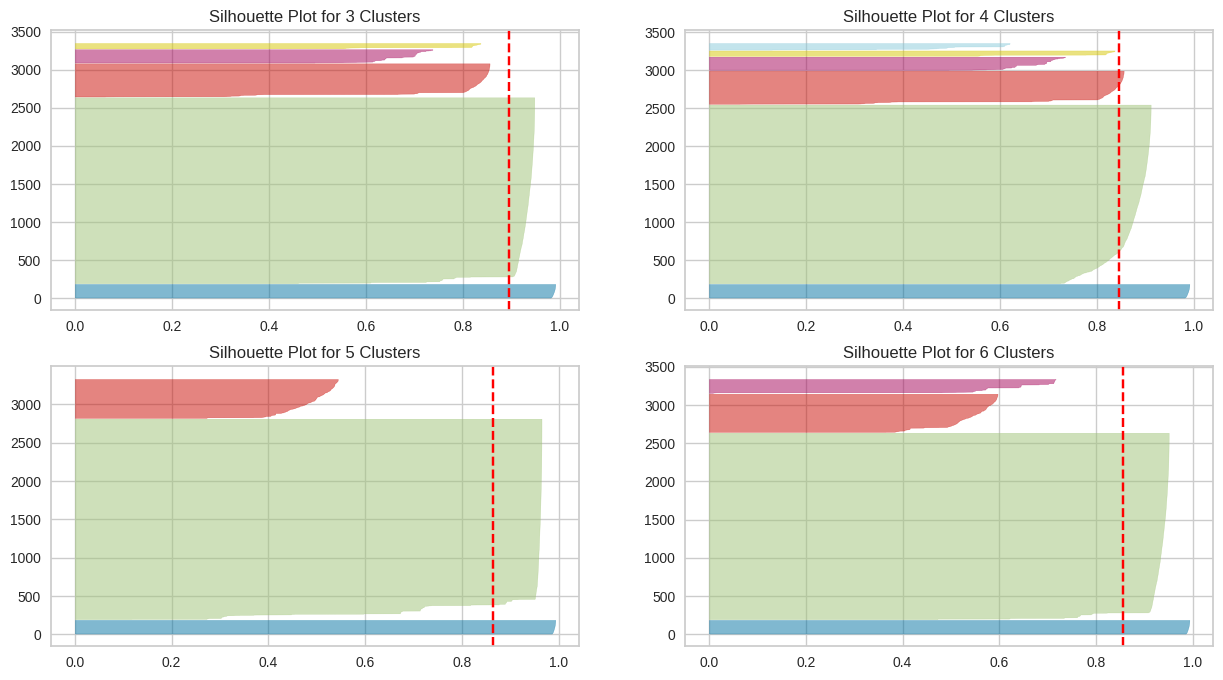

In [281]:
# Use Silhoutte visualizer to assess the quality of the clusters for different values of k
fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [3, 4, 5, 6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    ax[q][mod].set_title(f"Silhouette Plot for {k} Clusters")
    visualizer.fit(scaled_product_features)

In [282]:
# Apply KMeans clustering for products
optimal_product_clusters = 5  # Adjust based on the elbow method
kmeans_products = KMeans(n_clusters=optimal_product_clusters, random_state=42)
product_features['ProductCluster'] = kmeans_products.fit_predict(scaled_product_features)

# Ensure all feature names are strings to avoid errors
product_features.columns = product_features.columns.astype(str)

# Map product clusters back to the original dataframe
df_segmentation = df_segmentation.merge(product_features, on='NumericStockCode', how='left')

### Customer segmentation using K-Means

In [283]:
df_segmentation.shape

(526052, 15)

In [71]:
# extract numeric columns
retail_data.select_dtypes(include=['number']).columns

Index(['Quantity', 'UnitPrice', 'TotalPrice', 'Month', 'NumericStockCode',
       'Cancelled'],
      dtype='object')

In [72]:
# Other existing features
numeric_columns = ['Quantity', 'UnitPrice',  'TotalPrice', 'Month']  # Update based on the dataset removed 'NumericStockCode' 'CustomerID',

In [73]:
# categorical columns
categorical_columns = ['Country','DayOfWeek','Cancelled'
        ]
# removing some of the columns 'Description' , 'InvoiceDate'   'InvoiceNo', 'StockCode',

In [74]:
retail_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
CustomerID,0
Country,0
CustomerID_Flag,0
TotalPrice,0
Month,0


In [76]:
retail_data_scaled = retail_data.copy()

In [77]:
# scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
retail_data_scaled[numeric_columns] = scaler.fit_transform(retail_data[numeric_columns])

In [80]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
InvoiceDate,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Known,15.30,12,Wednesday,85123.0,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,NaN,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Known,22.00,12,Wednesday,84406.0,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Known,20.34,12,Wednesday,84029.0,0


In [43]:
# one hot encoding for the categorical values
retail_data_scaled = pd.get_dummies(retail_data, columns=categorical_columns)

In [81]:
# get only calncelled orders
cancelled_orders = retail_data[retail_data['Cancelled'] == 1]

In [83]:
cancelled_orders.shape

(10624, 13)

In [84]:
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
InvoiceDate,,,,,,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1


In [116]:
numeric_columns = ['Quantity', 'UnitPrice',  'TotalPrice']  # Update based on the dataset removed 'NumericStockCode' 'CustomerID',

In [117]:
# categorical columns
categorical_columns = ['Country','DayOfWeek','Cancelled'
        ]
# removing some of the columns 'Description' , 'InvoiceDate'   'InvoiceNo', 'StockCode',

In [145]:
# cancelled orders for scaling
cancelled_orders_copy = cancelled_orders.copy()
cancelled_orders_numeric = cancelled_orders[numeric_columns]

In [146]:
#cancelled_orders.drop('Cancelled', axis=1, inplace=True)

In [147]:
# scaling the cancelled orders
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancelled_orders_scaled = scaler.fit_transform(cancelled_orders_copy[numeric_columns])

In [148]:
# one hot encoding for the categorical data
#cancelled_orders_scaled = pd.get_dummies(cancelled_orders_scaled, columns=categorical_columns)

In [210]:
# top proudcts from cancelled_orders
cancelled_orders.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False).head(10)

,InvoiceNo
Description,
nan,862
Manual,244
REGENCY CAKESTAND 3 TIER,181
POSTAGE,126
check,120
JAM MAKING SET WITH JARS,87
Discount,77
SET OF 3 CAKE TINS PANTRY DESIGN,74
SAMPLES,61


In [207]:
cancelled_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10624 entries, 2010-12-01 09:41:00 to 2011-12-09 11:58:00
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         10624 non-null  object 
 1   StockCode         10624 non-null  object 
 2   Description       10624 non-null  object 
 3   Quantity          10624 non-null  int64  
 4   UnitPrice         10624 non-null  float64
 5   CustomerID        10624 non-null  object 
 6   Country           10624 non-null  object 
 7   CustomerID_Flag   10624 non-null  object 
 8   TotalPrice        10624 non-null  float64
 9   Month             10624 non-null  int32  
 10  DayOfWeek         10624 non-null  object 
 11  NumericStockCode  1055 non-null   float64
 12  Cancelled         10624 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 1.3+ MB


In [149]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt # Import the necessary library
import seaborn as sns

lof = LocalOutlierFactor(n_neighbors=5)
lof_predictions = lof.fit_predict(cancelled_orders_scaled)
lof_scores = -lof.negative_outlier_factor_
lof_scores

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


array([1.01040436, 1.        , 1.        , ..., 1.0378535 , 1.        ,
       1.        ])

Text(0.5, 0, 'Outlier Score')

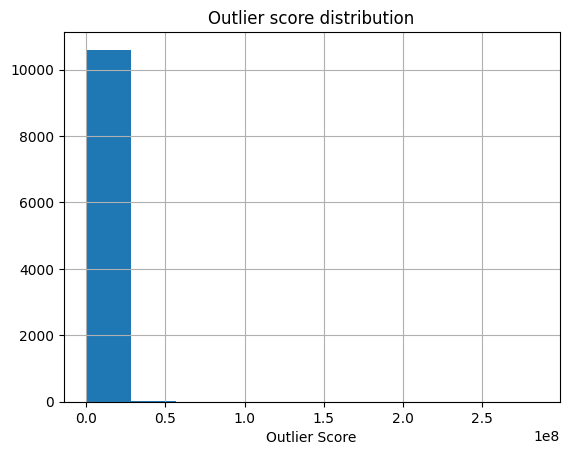

In [165]:
cancelled_orders_with_lof = pd.DataFrame(cancelled_orders_copy, columns=numeric_columns)

# Now you can assign the lof_scores as a new column
cancelled_orders_with_lof['lof_scores'] = lof_scores

# Proceed with plotting the histogram
cancelled_orders_with_lof['lof_scores'].hist()
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

Text(0.5, 0, 'Outlier Score')

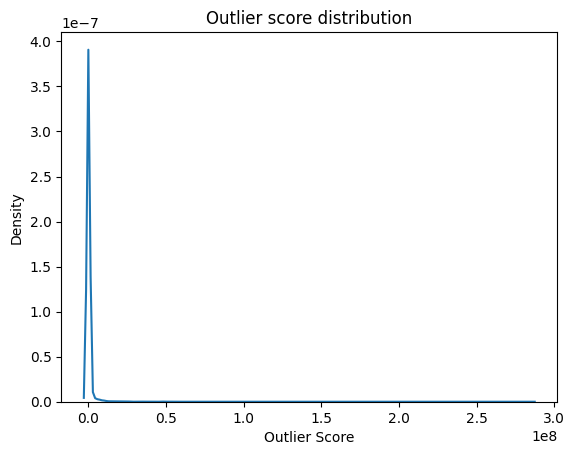

In [166]:
sns.kdeplot(cancelled_orders_with_lof['lof_scores'])
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

In [167]:
cancelled_orders_with_lof

,Quantity,UnitPrice,TotalPrice,lof_scores
InvoiceDate,,,,
2010-12-01 09:41:00,-1,27.50,-27.50,1.010404
2010-12-01 09:49:00,-1,4.65,-4.65,1.000000
2010-12-01 10:24:00,-12,1.65,-19.80,1.000000
2010-12-01 10:24:00,-24,0.29,-6.96,1.000000
2010-12-01 10:24:00,-24,0.29,-6.96,1.000000
...,...,...,...,...
2011-12-09 09:57:00,-11,0.83,-9.13,1.327546
2011-12-09 10:28:00,-1,224.69,-224.69,1.143092
2011-12-09 11:57:00,-5,10.95,-54.75,1.037854


In [204]:
cancelled_orders_with_lof.sort_values(['lof_scores'], ascending=False)[:25]

,Quantity,UnitPrice,TotalPrice,lof_scores,outlier_ind
InvoiceDate,,,,,
2011-04-08 16:03:00,-1479,0.00,-0.00,2.845730e+08,Yes
2011-01-20 15:41:00,-1400,0.00,-0.00,2.783468e+08,Yes
2011-05-04 13:23:00,-1512,0.00,-0.00,2.732193e+08,Yes
2011-11-16 13:10:00,-1510,0.00,-0.00,2.717544e+08,Yes
2011-11-07 10:37:00,-1560,0.00,-0.00,1.959415e+08,Yes
2011-02-04 16:06:00,-1430,0.00,-0.00,9.156144e+07,Yes
2011-01-25 17:21:00,-60,0.21,-12.60,6.614082e+07,Yes
2011-11-28 15:43:00,-4,18.00,-72.00,5.378117e+07,Yes
2011-02-21 13:58:00,-1,134.76,-134.76,5.224412e+07,Yes


In [154]:
# Selecting outlier based on threshold
threshold = 1.5

In [169]:
cancelled_orders_with_lof['outlier_ind'] = "No"
cancelled_orders_with_lof.loc[cancelled_orders_with_lof['lof_scores']>threshold, 'outlier_ind'] = "Yes"

In [170]:
# cancelled orders without lof_scores
cancelled_orders_without_lof = cancelled_orders_with_lof.copy()
cancelled_orders_without_lof.drop('lof_scores', axis=1, inplace=True)

In [171]:
cancelled_orders_with_lof

,Quantity,UnitPrice,TotalPrice,lof_scores,outlier_ind
InvoiceDate,,,,,
2010-12-01 09:41:00,-1,27.50,-27.50,1.010404,No
2010-12-01 09:49:00,-1,4.65,-4.65,1.000000,No
2010-12-01 10:24:00,-12,1.65,-19.80,1.000000,No
2010-12-01 10:24:00,-24,0.29,-6.96,1.000000,No
2010-12-01 10:24:00,-24,0.29,-6.96,1.000000,No
...,...,...,...,...,...
2011-12-09 09:57:00,-11,0.83,-9.13,1.327546,No
2011-12-09 10:28:00,-1,224.69,-224.69,1.143092,No
2011-12-09 11:57:00,-5,10.95,-54.75,1.037854,No


In [172]:
cancelled_orders_without_lof.head()

,Quantity,UnitPrice,TotalPrice,outlier_ind
InvoiceDate,,,,
2010-12-01 09:41:00,-1,27.50,-27.50,No
2010-12-01 09:49:00,-1,4.65,-4.65,No
2010-12-01 10:24:00,-12,1.65,-19.80,No
2010-12-01 10:24:00,-24,0.29,-6.96,No
2010-12-01 10:24:00,-24,0.29,-6.96,No


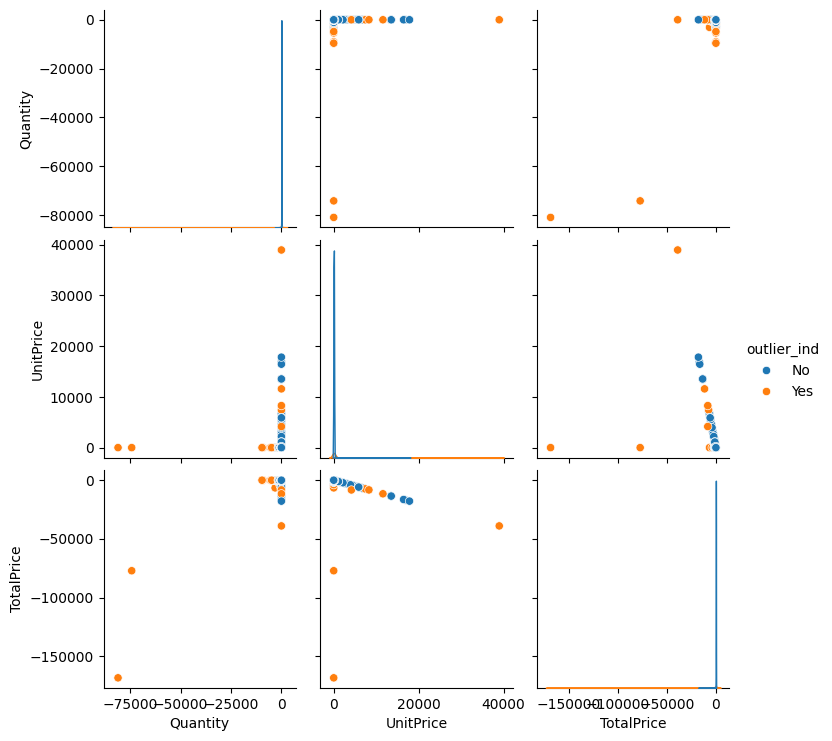

In [173]:
sns.pairplot(cancelled_orders_without_lof, hue = 'outlier_ind', diag_kind= "kde")

In [174]:
from sklearn.decomposition import PCA

cancelled_pca = cancelled_orders_without_lof.drop(["outlier_ind"], axis=1)
cancelled_pca.head()

,Quantity,UnitPrice,TotalPrice
InvoiceDate,,,
2010-12-01 09:41:00,-1,27.50,-27.50
2010-12-01 09:49:00,-1,4.65,-4.65
2010-12-01 10:24:00,-12,1.65,-19.80
2010-12-01 10:24:00,-24,0.29,-6.96
2010-12-01 10:24:00,-24,0.29,-6.96


In [175]:
pca = PCA(n_components=2)
prComponents = pca.fit_transform(cancelled_pca)
pca_df = pd.DataFrame(prComponents, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,72.132909,-0.263478
1,94.094563,-23.765258
2,75.858550,-28.946431
3,81.678761,-39.055796
4,81.678761,-39.055796


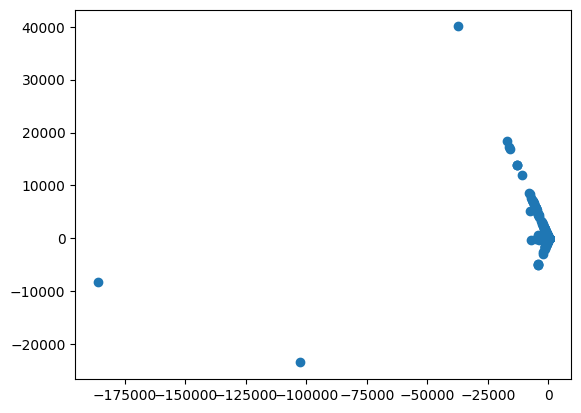

In [176]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])

In [178]:
pca_df['outlier'] = (cancelled_orders_with_lof['lof_scores']>threshold).values

In [179]:
pca_df.head()


,PC1,PC2,outlier
0,72.132909,-0.263478,False
1,94.094563,-23.765258,False
2,75.858550,-28.946431,False
3,81.678761,-39.055796,False
4,81.678761,-39.055796,False


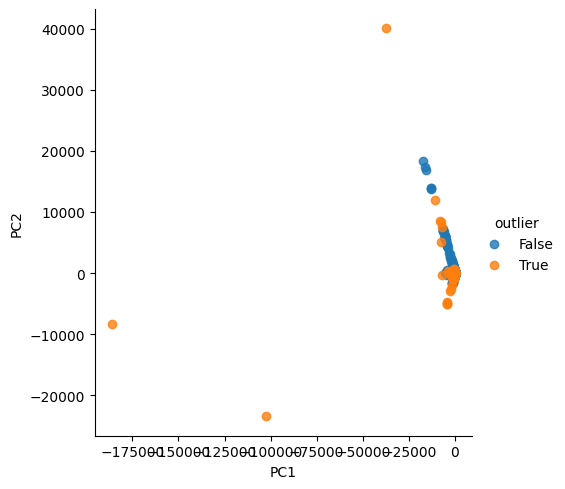

In [180]:
sns.lmplot(x="PC1", y="PC2", data=pca_df, fit_reg=False, hue='outlier')

In [181]:
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
InvoiceDate,,,,,,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 09:57:00,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,Known,-9.13,12,Friday,NaN,1
2011-12-09 10:28:00,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,Known,-224.69,12,Friday,NaN,1
2011-12-09 11:57:00,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,Known,-54.75,12,Friday,NaN,1


In [182]:
cancelled_temporal = cancelled_orders.copy()

In [184]:
# for temporal anomaly detection
cancelled_temporal['Month-Year'] = pd.to_datetime(cancelled_temporal.index, format="%m/%d/%Y")

In [185]:
from statsmodels.tsa.seasonal import STL

In [186]:
cancelled_temporal.set_index(['Month-Year'], inplace=True)

In [187]:
cancelled_temporal.index.freq = pd.infer_freq(cancelled_temporal.index)
cancelled_temporal.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
Month-Year,,,,,,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,Known,-27.50,12,Wednesday,NaN,1
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,Known,-4.65,12,Wednesday,35004.0,1
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,Known,-19.80,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,Known,-6.96,12,Wednesday,NaN,1


Text(0, 0.5, 'Quantity')

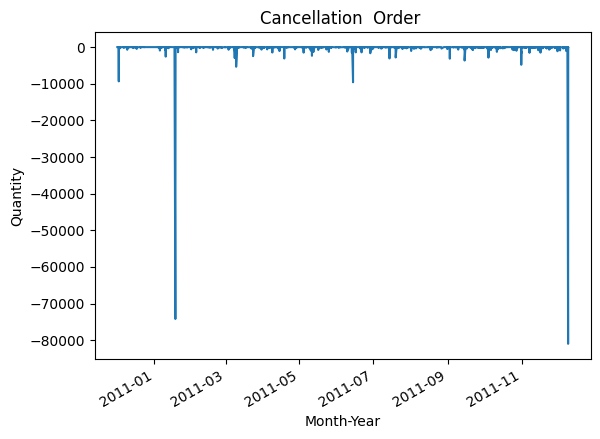

In [189]:
cancelled_temporal['Quantity'].plot()
plt.title("Cancellation  Order ")
plt.ylabel("Quantity")

In [202]:
from statsmodels.tsa.seasonal import STL
stl = STL(cancelled_temporal['Quantity'], trend=13, seasonal = 7,period=11)
res = stl.fit()

Text(0, 0.5, 'Quantity')

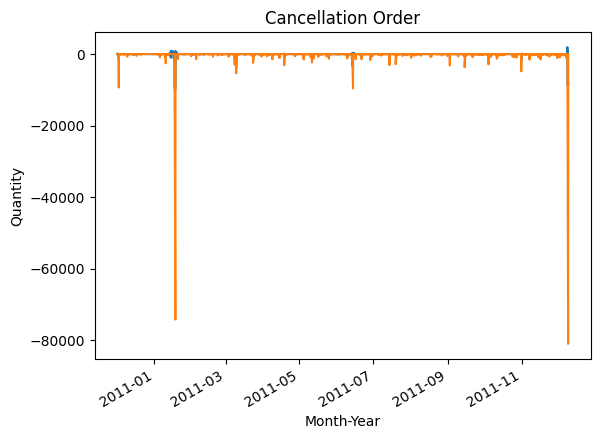

In [203]:
figure, ax = plt.subplots()
res.trend.plot(ax=ax)
cancelled_temporal['Quantity'].plot(ax=ax)
plt.title("Cancellation Order")
plt.ylabel("Quantity")

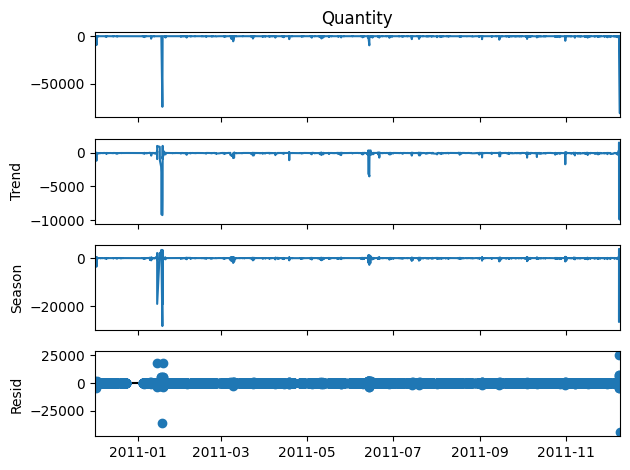

In [197]:
fig = res.plot()

Text(0.5, 1.0, 'Density of the Noise')

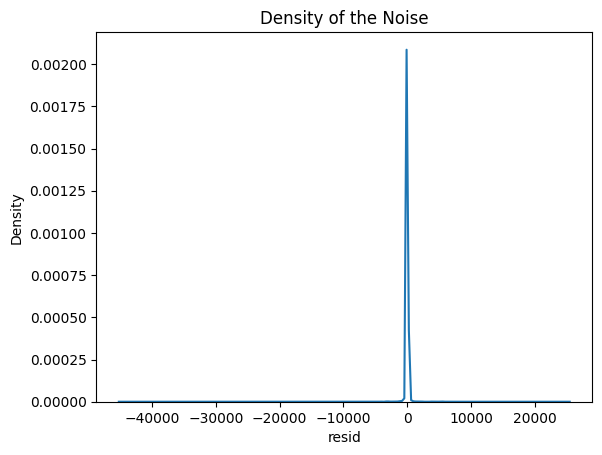

In [199]:
noise = res.resid
sns.kdeplot(noise)
plt.title("Density of the Noise")

In [ ]:
# filter retail_data with description WHITE HANGING HEART T-LIGHT HOLDER
white_hanging_heart = retail_data[retail_data['Description'] == 'WHITE HANGING HEART T-LIGHT H'

In [222]:
retail_data[retail_data['InvoiceNo'].isin(['581499','C581499'])]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerID_Flag,TotalPrice,Month,DayOfWeek,NumericStockCode,Cancelled
InvoiceDate,,,,,,,,,,,,,
2011-12-09 10:28:00,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,Known,-224.69,12,Friday,NaN,1
